In [1]:

import numpy as np
import matplotlib.pyplot as plt

import string
import random
import re
import requests
import os
import textwrap

In [2]:
letters1 = list(string.ascii_lowercase)
letters2 = list(string.ascii_lowercase)

true_mapping = {}

# shuffle 
random.shuffle(letters2)

# populate map
for k, v in zip(letters1, letters2):
    true_mapping[k] = v

In [4]:
# init matrix
M = np.ones((26, 26))

# init state distribution
pi = np.zeros(26)

# update the Markov matrix
def update_transition(ch1, ch2):
    i = ord(ch1) - 97
    j = ord(ch2) - 97
    M[i,j] += 1

#  update the initial state distribution
def update_pi(ch):
    i = ord(ch) - 97
    pi[i] += 1

# get the log-probability of a word
def get_word_prob(word):
  # print("word:", word)
    i = ord(word[0]) - 97
    logp = np.log(pi[i])

    for ch in word[1:]:
        j = ord(ch) - 97
        logp += np.log(M[i, j]) 
        i = j 

    return logp

# get the probability of a sequence of words
def get_sequence_prob(words):
  #split into tokens
    if type(words) == str:
        words = words.split()

    logp = 0
    for word in words:
        logp += get_word_prob(word)
    return logp

In [19]:
# replacing non-alpha characters
regex = re.compile('[^a-zA-Z]')

for line in open('moby_dick.txt',encoding="utf8"): # learn file
    line = line.rstrip()

  # blank lines 
    if line:
        line = regex.sub(' ', line) # replace non-alpha characters with space

    # split the tokens 
        tokens = line.lower().split()

        for token in tokens:

      # first letter
            ch0 = token[0]
            update_pi(ch0)

            for ch1 in token[1:]:
                update_transition(ch0, ch1)
                ch0 = ch1

# normalize probabilities
pi /= pi.sum()
M /= M.sum(axis=1, keepdims=True)
print(pi)
print(M)

[1.09511980e-01 5.19247406e-02 3.89620603e-02 2.71466837e-02
 1.82412021e-02 3.84161659e-02 1.63814599e-02 6.37956319e-02
 6.73809557e-02 3.91378569e-03 4.43192280e-03 2.82939873e-02
 3.91193520e-02 2.23446630e-02 6.49984502e-02 2.81922104e-02
 3.33088143e-03 1.80191433e-02 9.25938777e-02 1.64156940e-01
 1.23057564e-02 7.32331293e-03 6.73069361e-02 2.31311211e-05
 1.17274784e-02 1.57291623e-04]
[[5.60045640e-05 2.76521569e-02 3.35186145e-02 4.37394116e-02
  4.34034048e-04 8.68067724e-03 2.05536033e-02 1.07948421e-02
  4.74076978e-02 2.80022036e-04 1.46031392e-02 1.10650630e-01
  2.53699789e-02 2.10044383e-01 1.96015484e-04 2.33818239e-02
  5.60045640e-05 1.08396455e-01 9.77276225e-02 1.42265096e-01
  7.89661609e-03 2.33818239e-02 1.04028116e-02 4.34034048e-04
  2.94162945e-02 2.66020768e-03]
 [6.01775500e-02 2.65060253e-02 4.01415043e-09 5.07296288e-04
  2.55294841e-01 4.01415043e-09 6.34155484e-05 3.80473220e-04
  3.79201015e-02 5.38998443e-03 4.01415043e-09 1.20672154e-01
  8.2435396

In [35]:

original_message = '''Some years ago—never mind how long precisely—having

little or no money in my purse, and nothing particular to interest me

on shore, I thought I would sail about a little more and see the blue watery part

of the globe. It is a way I have of driving off the spleen and

regulating the circulation. Whenever I find myself growing grim about

the mouth; whenever it is a damp, drizzly November in my soul; whenever

I find myself involuntarily pausing before coffin houses, and

bringing up the rear of every funeral I meet; and especially whenever

my hypos get such an lower hand of all of me, that it requires a strong moral

principle to prevent me from deliberately stepping into the street, and

methodically knocking people’s hats off—then, I account it high time to

get to ocean as soon as I can.'''

# Away they went, and I was just wondering whether I should not do well
# to follow them when up the lane came a neat little landau, the coachman
# with his coat only half-buttoned, and his tie under his ear, while all
# the tags of his harness were sticking out of the buckles. It hadn't
# pulled up before she shot out of the hall door and into it. I only
# caught a glimpse of her at the moment, but she was a lovely woman, with
# a face that a man might die for.

# My cabby drove fast. I don't think I ever drove faster, but the others
# were there before us. The cab and the landau with their steaming horses
# were in front of the door when I arrived. I paid the man and hurried
# into the church. There was not a soul there save the two whom I had
# followed and a surpliced clergyman, who seemed to be expostulating with
# them. They were all three standing in a knot in front of the altar. I
# lounged up the side aisle like any other idler who has dropped into a
# church. Suddenly, to my surprise, the three at the altar faced round to
# me, and Godfrey Norton came running as hard as he could towards me.

In [36]:
def encode_message(msg):
    msg = msg.lower()

    msg = regex.sub(' ', msg)

    coded_msg = []
    for ch in msg:
        coded_ch = ch #a space
        if ch in true_mapping:
            coded_ch = true_mapping[ch]
        coded_msg.append(coded_ch)

    return ''.join(coded_msg)


encoded_message = encode_message(original_message)


def decode_message(msg, word_map):
    decoded_msg = []
    for ch in msg:
        decoded_ch = ch # could just be a space
        if ch in word_map:
            decoded_ch = word_map[ch]
        decoded_msg.append(decoded_ch)

    return ''.join(decoded_msg)

In [37]:
#run evolutionary algorithm 

#initialization 
dna_pool = []
for _ in range(20):
    dna = list(string.ascii_lowercase)
    random.shuffle(dna)
    dna_pool.append(dna)

In [38]:
def evolve_offspring(dna_pool, n_children):
  # make n_children per offspring
    offspring = []

    for dna in dna_pool:
        for _ in range(n_children):
            copy = dna.copy()
            j = np.random.randint(len(copy))
            k = np.random.randint(len(copy))

      # swap
            tmp = copy[j]
            copy[j] = copy[k]
            copy[k] = tmp
            offspring.append(copy)

    return offspring + dna_pool

In [39]:
num_iters = 1000
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_score = float('-inf')
for i in range(num_iters):
    if i > 0:
    # offspring from the current dna pool
        dna_pool = evolve_offspring(dna_pool, 3)

  # score each dna
    dna2score = {}
    for dna in dna_pool:
    # populate map
        current_map = {}
        for k, v in zip(letters1, dna):
            current_map[k] = v

        decoded_message = decode_message(encoded_message, current_map)
        score = get_sequence_prob(decoded_message)

    # store it
        dna2score[''.join(dna)] = score

    # best so far
        if score > best_score:
            best_dna = dna
            best_map = current_map
            best_score = score

  # average score for generation
    scores[i] = np.mean(list(dna2score.values()))

  # keep the best 5 dna
    sorted_dna = sorted(dna2score.items(), key=lambda x: x[1], reverse=True)
    dna_pool = [list(k) for k, v in sorted_dna[:5]]

    if i % 200 == 0:
        print("iter:", i, "score:", scores[i], "best so far:", best_score)


iter: 0 score: -4606.393295980799 best so far: -3639.4002774635787
iter: 200 score: -1815.6717839013004 best so far: -1515.1743046490565
iter: 400 score: -1719.9751438158378 best so far: -1495.6717748750143
iter: 600 score: -1730.7589665042026 best so far: -1495.6717748750143
iter: 800 score: -1746.844511777799 best so far: -1495.6717748750143


In [40]:
# best score
decoded_message = decode_message(encoded_message, best_map)

print("LL of decoded message:", get_sequence_prob(decoded_message))
print("LL of true message:", get_sequence_prob(regex.sub(' ', original_message.lower())))


#wrong letters
for true, v in true_mapping.items():
    pred = best_map[v]
    if true != pred:
        print("true: %s, pred: %s" % (true, pred))

LL of decoded message: -1495.6717748750143
LL of true message: -1495.6717748750143
true: j, pred: x
true: x, pred: j


In [41]:
# final decoded message
print("Decoded message:\n", textwrap.fill(decoded_message))

print("\nTrue message:\n", original_message)

Decoded message:
 some years ago never mind how long precisely having  little or no
money in my purse  and nothing particular to interest me  on shore  i
thought i would sail about a little more and see the blue watery part
of the globe  it is a way i have of driving off the spleen and
regulating the circulation  whenever i find myself growing grim about
the mouth  whenever it is a damp  drizzly november in my soul
whenever  i find myself involuntarily pausing before coffin houses
and  bringing up the rear of every funeral i meet  and especially
whenever  my hypos get such an lower hand of all of me  that it
requires a strong moral  principle to prevent me from deliberately
stepping into the street  and  methodically knocking people s hats off
then  i account it high time to  get to ocean as soon as i can

True message:
 Some years ago—never mind how long precisely—having

little or no money in my purse, and nothing particular to interest me

on shore, I thought I would sail about a li

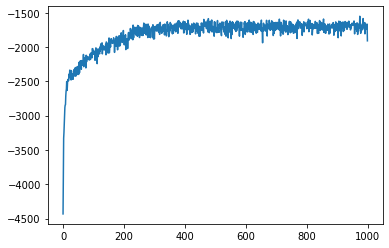

In [34]:
plt.plot(scores)
plt.show()